In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

2024-06-04 15:17:26.495300: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 15:17:26.550794: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 15:17:26.553712: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 15:17:27.801005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# 加载预训练的MobileNetV2模型，并且不包括顶层分类器
base_model = MobileNetV2(weights='imagenet', alpha=1.0, include_top=False, input_shape=(224, 224, 3))

# 冻结 MobileNetV2 中的所有层，使其权重不可训练
for layer in base_model.layers:
    layer.trainable = False
    
# 创建一个新的顶层分类器
model = Sequential()
model.add(base_model)
model.add(Conv2D(filters=64, kernel_size=2, strides=2, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 64)          327744    
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 128)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 128)         0         
 D)                                                     

In [4]:
# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 设置模型保存路径和保存条件
checkpoint_path = "best_model_fine_mobilenetV2_paper"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# 准备数据
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    './datav2/tdata',  # 替换为你的训练数据目录
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical')

Found 507 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(
    './datav2/vdata',  # 替换为你的验证数据目录
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical')

Found 115 images belonging to 2 classes.


In [7]:
# 训练模型
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=10,
          validation_data=validation_generator,
          validation_steps=len(validation_generator),
          callbacks=[checkpoint])

Epoch 1/10
127/127 [==============================] - ETA: 0s - loss: 1.1299 - accuracy: 0.6154
Epoch 1: val_accuracy improved from -inf to 0.64348, saving model to best_model_fine_mobilenetV2_paper


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


127/127 [==============================] - 35s 250ms/step - loss: 1.1299 - accuracy: 0.6154 - val_loss: 0.6682 - val_accuracy: 0.6435
Epoch 2/10
127/127 [==============================] - ETA: 0s - loss: 0.6793 - accuracy: 0.6312
Epoch 2: val_accuracy did not improve from 0.64348
127/127 [==============================] - 14s 107ms/step - loss: 0.6793 - accuracy: 0.6312 - val_loss: 0.5992 - val_accuracy: 0.6435
Epoch 3/10
127/127 [==============================] - ETA: 0s - loss: 0.5707 - accuracy: 0.6903
Epoch 3: val_accuracy improved from 0.64348 to 0.71304, saving model to best_model_fine_mobilenetV2_paper


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


127/127 [==============================] - 30s 240ms/step - loss: 0.5707 - accuracy: 0.6903 - val_loss: 0.5945 - val_accuracy: 0.7130
Epoch 4/10
127/127 [==============================] - ETA: 0s - loss: 0.5284 - accuracy: 0.7101
Epoch 4: val_accuracy improved from 0.71304 to 0.73913, saving model to best_model_fine_mobilenetV2_paper
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


127/127 [==============================] - 31s 243ms/step - loss: 0.5284 - accuracy: 0.7101 - val_loss: 0.4551 - val_accuracy: 0.7391
Epoch 5/10
127/127 [==============================] - ETA: 0s - loss: 0.5050 - accuracy: 0.7495
Epoch 5: val_accuracy improved from 0.73913 to 0.79130, saving model to best_model_fine_mobilenetV2_paper
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


127/127 [==============================] - 31s 246ms/step - loss: 0.5050 - accuracy: 0.7495 - val_loss: 0.4669 - val_accuracy: 0.7913
Epoch 6/10
127/127 [==============================] - ETA: 0s - loss: 0.4313 - accuracy: 0.7870
Epoch 6: val_accuracy improved from 0.79130 to 0.81739, saving model to best_model_fine_mobilenetV2_paper
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


127/127 [==============================] - 31s 244ms/step - loss: 0.4313 - accuracy: 0.7870 - val_loss: 0.3834 - val_accuracy: 0.8174
Epoch 7/10
127/127 [==============================] - ETA: 0s - loss: 0.3745 - accuracy: 0.8205
Epoch 7: val_accuracy improved from 0.81739 to 0.85217, saving model to best_model_fine_mobilenetV2_paper
INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


INFO:tensorflow:Assets written to: best_model_fine_mobilenetV2_paper/assets


127/127 [==============================] - 30s 238ms/step - loss: 0.3745 - accuracy: 0.8205 - val_loss: 0.3714 - val_accuracy: 0.8522
Epoch 8/10
127/127 [==============================] - ETA: 0s - loss: 0.3897 - accuracy: 0.8521
Epoch 8: val_accuracy did not improve from 0.85217
127/127 [==============================] - 13s 104ms/step - loss: 0.3897 - accuracy: 0.8521 - val_loss: 0.4967 - val_accuracy: 0.7130
Epoch 9/10
127/127 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.8185
Epoch 9: val_accuracy did not improve from 0.85217
127/127 [==============================] - 13s 100ms/step - loss: 0.4134 - accuracy: 0.8185 - val_loss: 0.4795 - val_accuracy: 0.7130
Epoch 10/10
127/127 [==============================] - ETA: 0s - loss: 0.3472 - accuracy: 0.8481
Epoch 10: val_accuracy did not improve from 0.85217
127/127 [==============================] - 13s 103ms/step - loss: 0.3472 - accuracy: 0.8481 - val_loss: 0.4117 - val_accuracy: 0.8435


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


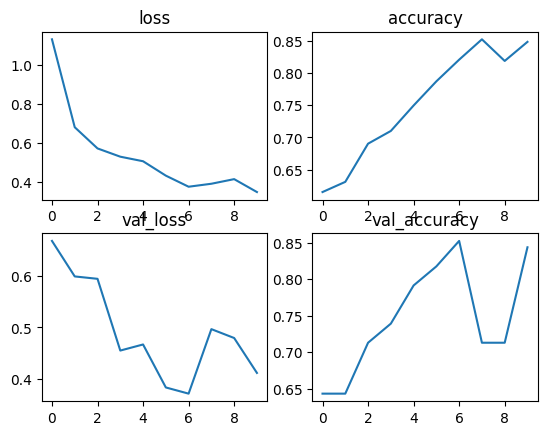

In [13]:
import matplotlib.pyplot as plt
print(history.history.keys())  # 查看字典的键
loss = history.history['loss']  # 测试集损失
acc = history.history['accuracy']  # 测试集准确率
val_loss = history.history['val_loss']  # 验证集损失
val_acc = history.history['val_accuracy']  # 验证集准确率

# 可视化，定义2*2的画布
plt.figure()
plt.subplot(221)
plt.plot(loss)
plt.title('loss')
plt.subplot(222)
plt.plot(acc)
plt.title('accuracy')
plt.subplot(223)
plt.plot(val_loss)
plt.title('val_loss')
plt.subplot(224)
plt.plot(val_acc)
plt.title('val_accuracy')
plt.show()

In [21]:
# 加载最佳模型
best_model = tf.keras.models.load_model(checkpoint_path)

# 评估模型
test_loss, test_acc = best_model.evaluate(validation_generator, steps=50)
print('Test accuracy:', test_acc)

35/50 [====================>.........] - ETA: 1s - loss: 0.3423 - accuracy: 0.9130WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


50/50 [==============================] - 4s 52ms/step - loss: 0.3423 - accuracy: 0.9130
Test accuracy: 0.9130434989929199


In [22]:
tmp = []
print(len(validation_generator))
for ite in range(len(validation_generator)):
    tmp = tmp+list(validation_generator[ite][1])
ry = [list(i).index(max(i)) for i in tmp]
print(ry)

35
[0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0]


In [38]:
predictions = best_model.predict(validation_generator)
py = [list(predictions[i]).index(max(predictions[i])) for i in range(len(predictions))]
print(py)
print(ry)

35/35 [==============================] - 3s 75ms/step
[1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0]
[0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0]


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ry, py)

array([[37,  0,  4],
       [ 0, 23,  0],
       [ 8,  0, 66]])

1/1 [==============================] - 0s 62ms/step


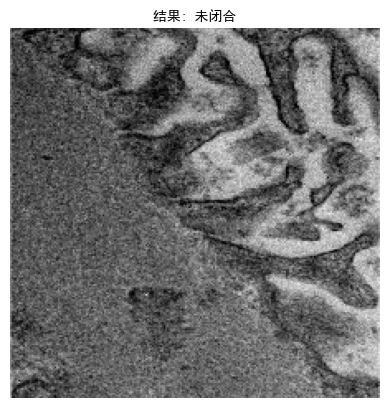

In [37]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
# 从目录中选取一张图片并准备好输入模型进行识别
image_path = 'testdata/unmer9.jpg'
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 进行预测
labels = ['闭合', '异常', '未闭合']
predictions = best_model.predict(x)
res = labels[list(predictions[0]).index(max(predictions[0]))]
my_font = font_manager.FontProperties(fname="./simhei.ttf")
# 显示图片
plt.imshow(img)
plt.title('结果: '+res,fontproperties=my_font )
plt.axis('off')  # 关闭坐标轴
plt.show()